# CHAPTER 2 - The Tools of the Trade in Quantum Computing - PennyLane Code


*Note*: You may skip the following three cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.




In [7]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.quantum_info import Statevector

In [8]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc

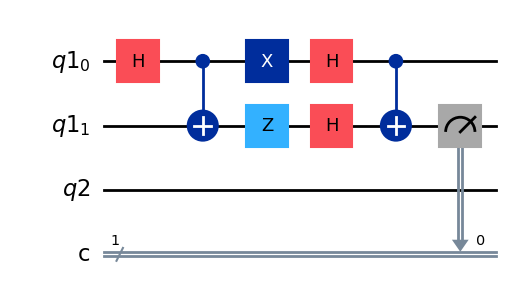

In [32]:
sim = AerSimulator()
sim_GPU = AerSimulator(device="GPU")

qbitsize = 2
qreg1 = QuantumRegister(qbitsize, "q1")
qreq2 = QuantumRegister(1, "q2")
creq = ClassicalRegister(1, "c")
qc = QuantumCircuit(qreg1,qreq2,creq, name="quantum circuit")

qc.h(0)
qc.cx(0,1)
qc.z(1)
qc.x(0)
qc.h(qreg1)
qc.cx(0,1)
qc.measure(qreg1[1],creq)
compiled_qc = transpile(qc,sim)

qc.draw('mpl')

In [10]:
job = sim.run(compiled_qc, shots = 1024)
results = job.result()
counts = results.get_counts()
sign = "-" if list(counts.keys())[0][0] == "1" else "+"
print("Phase of the entangled state:", sign)

Phase of the entangled state: -


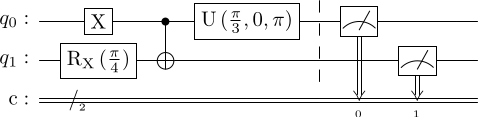

In [11]:
qc = QuantumCircuit(2,2)
qc.x(0)
qc.rx(np.pi/4,1)
qc.cx(0,1)
qc.u(np.pi/3,0,np.pi,0)
qc.barrier()
qc.measure(range(2),range(2))

qc.draw('latex')


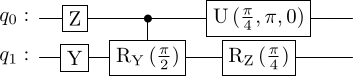

In [12]:
qc = QuantumCircuit(2)
qc.z(0)
qc.y(1)
qc.cry(np.pi/2,0,1)
qc.u(np.pi/4,np.pi,0,0)
qc.rz(np.pi/4,1)

qc.draw('latex')

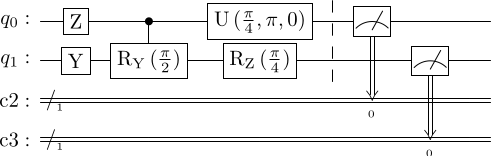

In [27]:
def own_measure_all(qc, add_bits = True):
    qc.barrier()
    for qbit,i  in enumerate(qc.qubits):
        if add_bits:
            creg_indices = len(qc.clbits)
            qc.add_register(ClassicalRegister(1))
            qc.measure(qbit, [creg_indices])
        else:
            qc.measure(qbit, [i])

    return qc

qc = own_measure_all(qc)
qc.draw("latex")

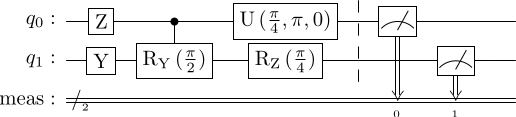

In [60]:
qc = QuantumCircuit(2)
qc.z(0)
qc.y(1)
qc.cry(np.pi/2,0,1)
qc.u(np.pi/4,np.pi,0,0)
qc.rz(np.pi/4,1)
sv = Statevector.from_label("00").evolve(qc)
qc.measure_all()

qc.draw('latex')

{'10': 875, '11': 149}


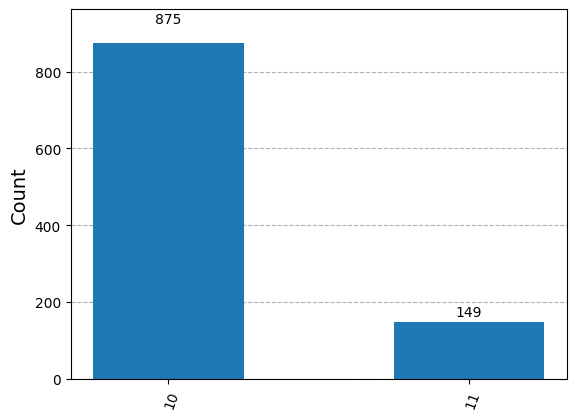

In [78]:
compiled_qc = transpile(qc,sim)
job = sim.run(compiled_qc, shots = 1024)
results = job.result()
counts = results.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [58]:
sv.draw('latex')

<IPython.core.display.Latex object>